20 Years of Gold: Is It Still a Safe Haven Asset?

In [214]:
!pip install yfinance --quiet
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('/Users/aaiyshadakka/Downloads/archive/XAU_1d_data.csv', sep = ';')
df.head()

,Date,Open,High,Low,Close,Volume
0,2004.06.11 00:00,384.0,384.8,382.8,384.1,272
1,2004.06.14 00:00,384.3,385.8,381.8,382.8,1902
2,2004.06.15 00:00,382.8,388.8,381.1,388.6,1951
3,2004.06.16 00:00,387.1,389.8,382.6,383.8,2014
4,2004.06.17 00:00,383.6,389.3,383.0,387.6,1568


In [24]:
#Lets check data types, basic statisics and null values.
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5391 non-null   object 
 1   Open    5391 non-null   float64
 2   High    5391 non-null   float64
 3   Low     5391 non-null   float64
 4   Close   5391 non-null   float64
 5   Volume  5391 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 252.8+ KB
None
              Open         High          Low        Close        Volume
count  5391.000000  5391.000000  5391.000000  5391.000000  5.391000e+03
mean   1351.249024  1361.248208  1341.127752  1351.567527  8.707645e+04
std     548.743404   552.815301   545.007579   549.292651  1.073524e+05
min     382.800000   384.800000   381.100000   382.800000  2.000000e+00
25%    1008.135000  1018.045000   999.275000  1007.215000  2.487950e+04
50%    1292.420000  1299.500000  1285.410000  1292.480000  7.173500e+04
75%    1723.255000  1735.

In [33]:
#Convert the date column from object (string) format to date time for visualization and further analysis.
df['Date'] = pd.to_datetime(df['Date'], format='%Y.%m.%d %H:%M')

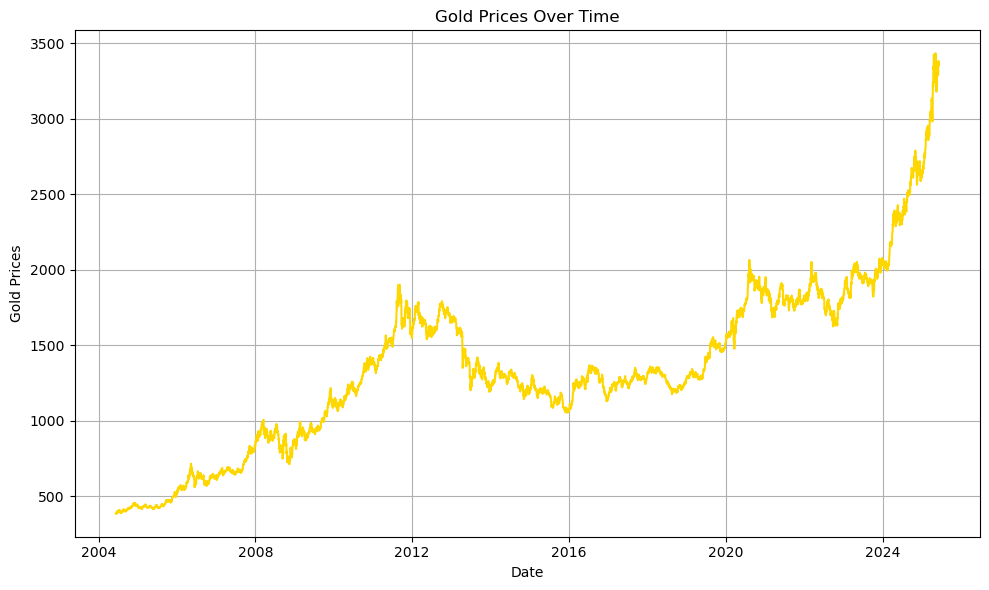

In [275]:
#Lets visualize gold prices over time
plt.figure(figsize = (10,6))
plt.plot(df['Date'], df['Close'], color = 'gold')
plt.xlabel('Date')
plt.ylabel('Gold Prices')
plt.title('Gold Prices Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
#to understand the price behaviour
print(df['Close'].describe())

count    5391.000000
mean     1351.567527
std       549.292651
min       382.800000
25%      1007.215000
50%      1292.480000
75%      1724.460000
max      3431.480000
Name: Close, dtype: float64


We have 20 years of daily gold prices. (5391 days)
on average gold was traded at 1352 over this entire period. 
our standard deviation is 549.3, suggesting that the price of gold was volitale over this period.
conclustion:
From 2004 to present, gold prices ranged from $382 to $3,431, with a median price of $1,292. This wide spread and high standard deviation ($549) highlight gold’s long-term volatility and growth. The data suggests that gold has significantly appreciated in value, though with considerable ups and downs along the way.”

In [45]:
#we will calculate daily return to transform raw prices into investment insights
df['daily_return'] = df['Close'].pct_change()
print(df['daily_return'])

0            NaN
1      -0.003385
2       0.015152
3      -0.012352
4       0.009901
          ...   
5386    0.027884
5387   -0.008203
5388    0.005768
5389   -0.006011
5390    0.005060
Name: daily_return, Length: 5391, dtype: float64


In [57]:
total_days = df['daily_return'].dropna().shape[0]
up_days = df[df['daily_return'] > 0].shape[0]
down_days = df[df['daily_return'] < 0].shape[0]
print(f" up days: {up_days}, down days: {down_days}")
up_percent = (up_days/total_days) *100
down_percent = (down_days/total_days) *100
print(f'Up Days: {up_days} ({up_percent:.2f}%)')
print(f'Down Days: {down_days} ({down_percent:.2f}%)')

 up days: 2844, down days: 2529
Up Days: 2844 (52.76%)
Down Days: 2529 (46.92%)


"Out of ~5,390 trading days between 2004 and 2023, 
gold prices rose on approximately 52.8% of days and declined on 46.9%,
confirming a slight long-term upward bias in gold while highlighting day-to-day volatility."

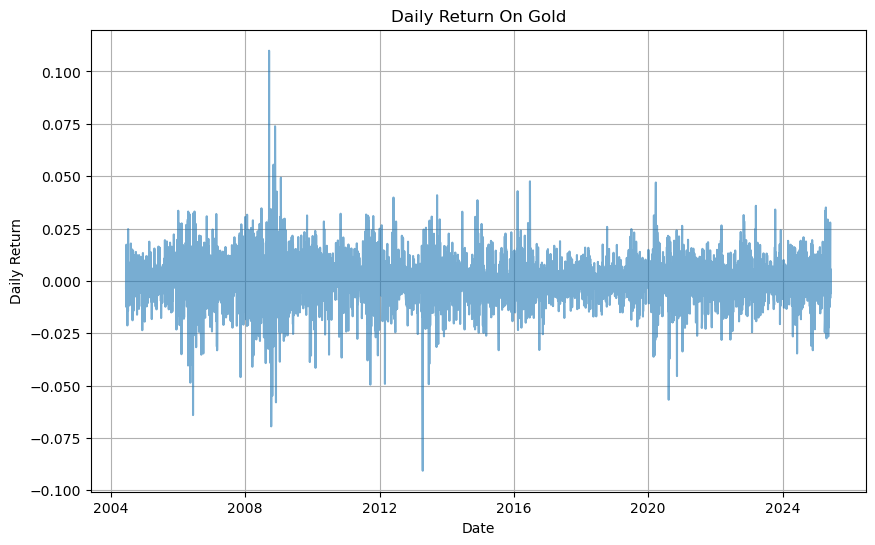

In [305]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['daily_return'], alpha = 0.6)
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Return On Gold')
plt.grid(True)

We observe noticeable spikes in daily returns during major market crises, particularly the 2008 financial crisis. However, overall, gold returns exhibit a relatively stable trend over time.

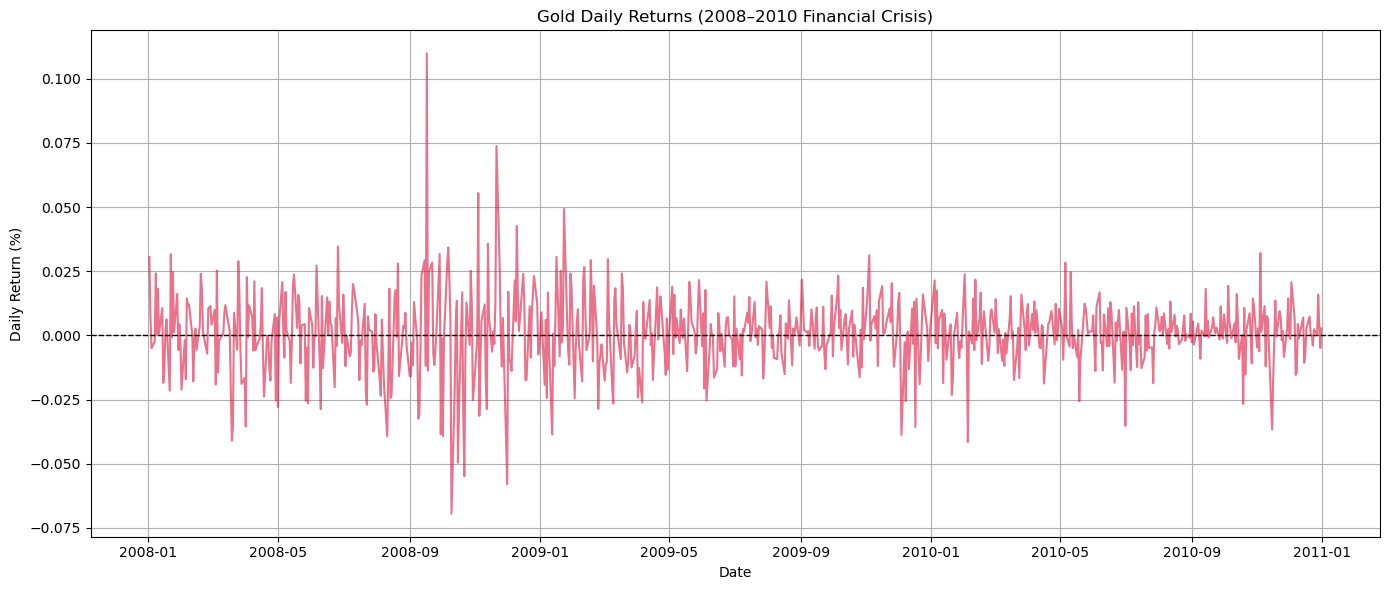

In [92]:
#Lets zoom in on the 2008-2010 financial crisis
mask = (df['Date'] >= '2008-01-01') & (df['Date'] <= '2010-12-31')
df_zoom = df[mask]
plt.figure(figsize=(14,6))
plt.plot(df_zoom['Date'], df_zoom['daily_return'], color='crimson', alpha=0.6)
plt.title('Gold Daily Returns (2008–2010 Financial Crisis)')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [102]:
df['rolling_volatility'] = df['daily_return'].rolling(window=30).std() * (252**0.5)


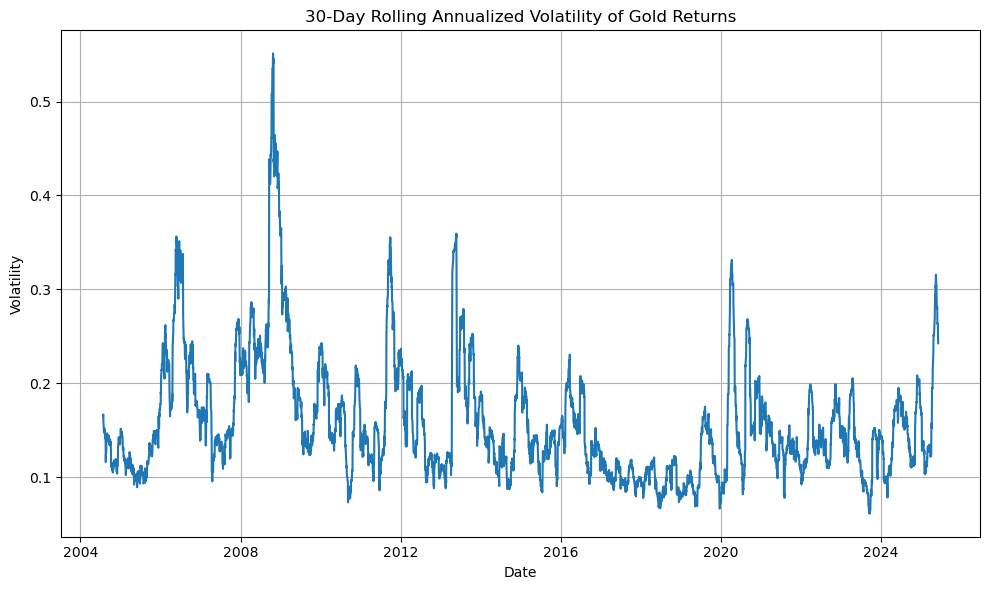

In [280]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['rolling_volatility'])
plt.title('30-Day Rolling Annualized Volatility of Gold Returns')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.tight_layout()
plt.grid(True)
plt.show()


Spikes in rolling volatility represent periods of market turbulence, where gold prices became more unpredictable.
For example, volatility surged in early 2020 during the onset of COVID-19,
suggesting heightened uncertainty and gold’s role as a reactive asset.

In [109]:
top_three_vol = df[['Date', 'rolling_volatility']].sort_values(by = 'rolling_volatility', ascending = False).head(3)
top_three_vol

,Date,rolling_volatility
1110,2008-10-23,0.551378
1109,2008-10-22,0.551289
1111,2008-10-24,0.548187


The highest rolling volatility in gold prices occurred in late October 2008, peaking at ~0.55 annualized standard deviation. This aligns with the peak of the global financial crisis, when markets were experiencing extreme stress. Gold, often seen as a safe haven, showed elevated volatility as investor sentiment fluctuated dramatically.”

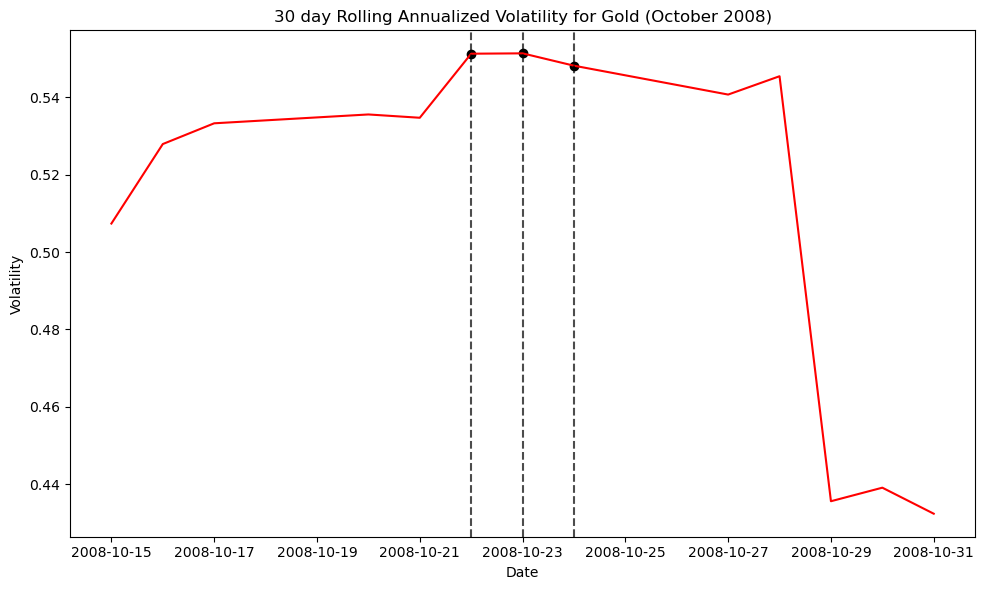

In [135]:
#now lets plot the above dates 
zoomed_dates = (df['Date'] >= '2008-10-15') & (df['Date'] <= '2008-10-31')
df_zoom = df[zoomed_dates]

plt.figure(figsize = (10,6))
plt.plot(df_zoom['Date'], df_zoom['rolling_volatility'], label = 'Rolling Volatility', color = 'red')
plt.scatter(top_three_vol['Date'], top_three_vol['rolling_volatility'], label = 'Top Three Peaks', color = 'black')

for i, row in top_three_vol.iterrows():
    plt.axvline(row['Date'], color='black', linestyle='--', alpha=0.7)   
               
plt.title('30 day Rolling Annualized Volatility for Gold (October 2008)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.tight_layout()
plt.show()

In [254]:
#lets download the S&P 500 historcial stock data from the yfinance library.
#clean the multi indexed column names. 
import yfinance as yf

sp500 = yf.download('^GSPC', start='2000-01-01', end='2025-06-25')

sp500.reset_index(inplace=True)
sp500.columns = [col[0] if col[1] == '' else col[0] for col in sp500.columns]

print(sp500.head())
print(sp500.info())




/var/folders/hn/z32zbbnn30x9z1bf054ctz640000gn/T/ipykernel_81411/735423568.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='2000-01-01', end='2025-06-25')
[*********************100%***********************]  1 of 1 completed

        Date        Close         High          Low         Open      Volume
0 2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   931800000
1 2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971  1009000000
2 2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044  1085500000
3 2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985  1092300000
4 2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951  1225200000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405 entries, 0 to 6404
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6405 non-null   datetime64[ns]
 1   Close   6405 non-null   float64       
 2   High    6405 non-null   float64       
 3   Low     6405 non-null   float64       
 4   Open    6405 non-null   float64       
 5   Volume  6405 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 300.4 KB
None


In [257]:
#Caluclate daily returns for the s&p 500
sp500['daily_return'] = sp500['Close'].pct_change()
sp500['daily_return']

0            NaN
1      -0.038345
2       0.001922
3       0.000956
4       0.027090
          ...   
6400   -0.011296
6401    0.009393
6402   -0.008352
6403   -0.000309
6404    0.004456
Name: daily_return, Length: 6405, dtype: float64

Lets compare gold and S&P 500 behaviour during the 2008 market crash

In [246]:
start_date = '2008-10-01'
end_date = '2008-10-31'

sp500_zoom = sp500[(sp500['Date'] >= start_date)& (sp500['Date'] <= end_date)]
gold_zoom = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

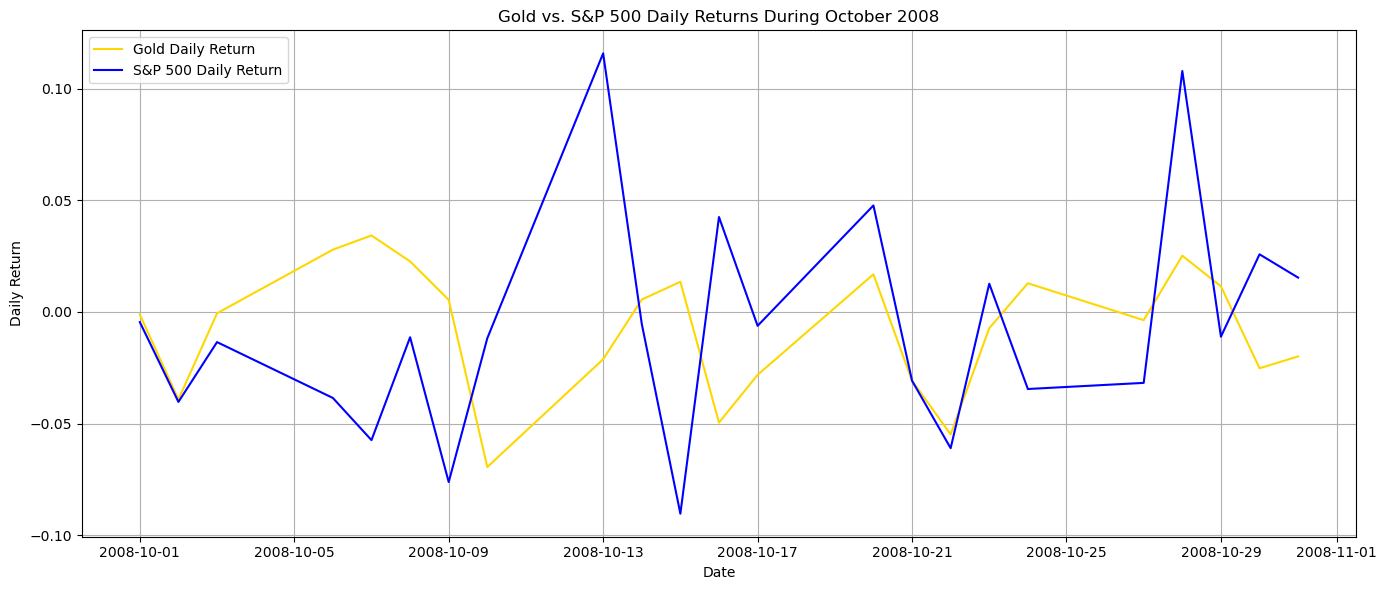

In [250]:
#Now lets plot daily returns(for gold and the S&P 500)on the same graph for comparison
plt.figure(figsize = (14,6))
plt.plot(gold_zoom['Date'], gold_zoom['daily_return'], label = 'Gold Daily Return', color = 'gold')
plt.plot(sp500_zoom['Date'], sp500_zoom['daily_return'], label = 'S&P 500 Daily Return', color = 'blue') 
plt.title('')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the graph, we can see that the S&P 500 shows sharper and more severe price swings compared to gold. This suggests that equities are more sensitive to market shocks, while gold tends to show less severe sensitivity, indicating that gold is a safer-haven asset during times of economic uncertainty.

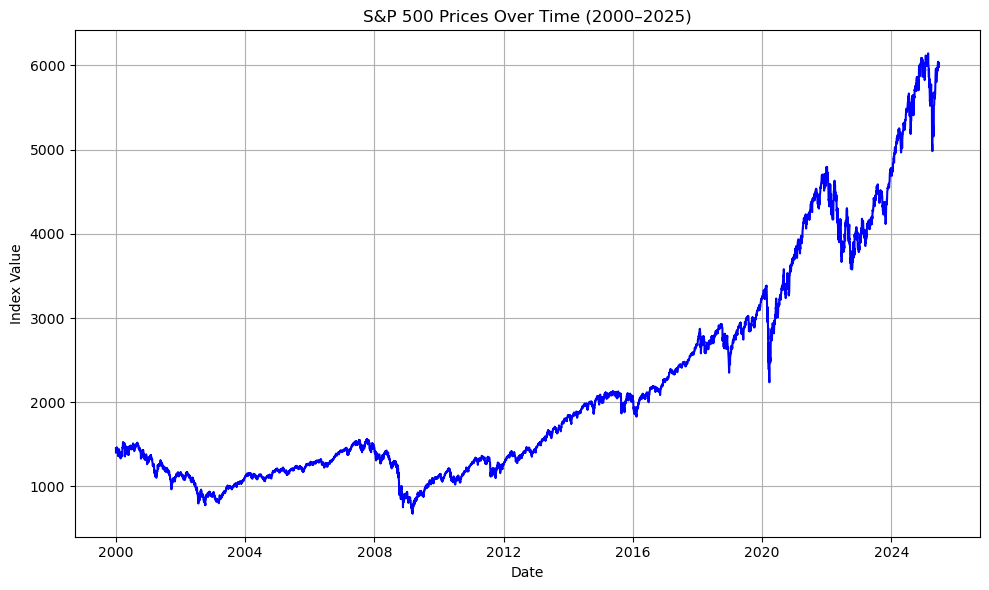

In [273]:
#Lets visualize S&P 500 over time
plt.figure(figsize = (10,6))
plt.plot(sp500['Date'], sp500['Close'], color = 'blue')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('S&P 500 Prices Over Time (2000–2025)')
plt.grid(True)
plt.tight_layout()
plt.show()

The S&P 500 shows a general upward trend over two decades, punctuated by sharp declines during major financial crises such as the 2008 recession and the COVID-19 pandemic.

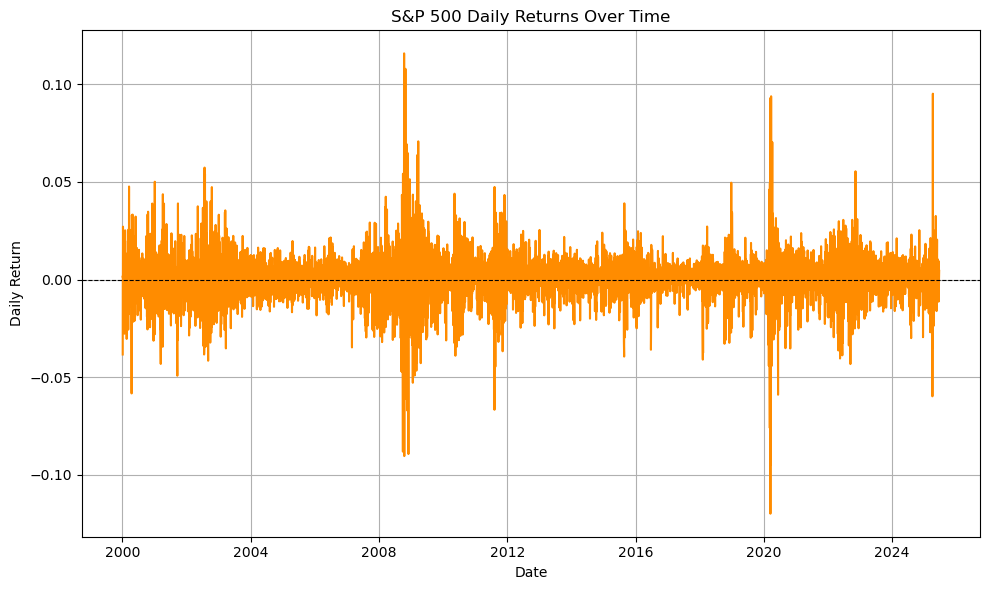

In [278]:
# Plot daily return for S&P 500
plt.figure(figsize=(10,6))
plt.plot(sp500['Date'], sp500['daily_return'], color='darkorange', label='S&P 500 Daily Return')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('S&P 500 Daily Returns Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


Daily returns for the S&P 500 reveal significant short-term volatility, with major spikes and drops during market stress periods — especially around 2008 and 2020.

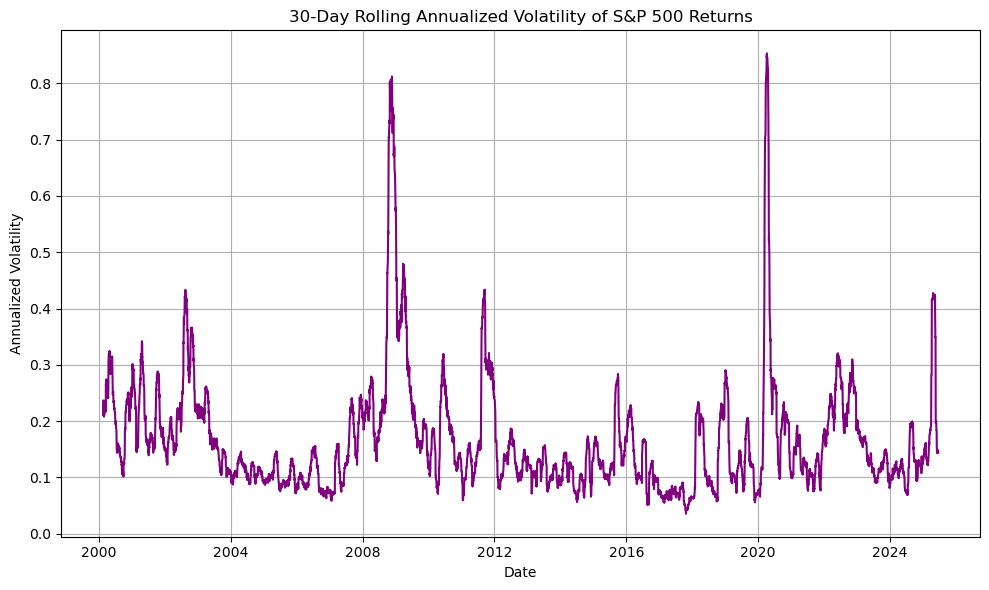

In [299]:
sp500['rolling_volatility'] = sp500['daily_return'].rolling(window=30).std() * (252**0.5)

plt.figure(figsize=(10,6))
plt.plot(sp500['Date'], sp500['rolling_volatility'], color='purple', label='S&P 500 Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.title('30-Day Rolling Annualized Volatility of S&P 500 Returns')
plt.grid(True)
plt.tight_layout()
plt.show()


The S&P 500’s volatility spiked sharply during the 2008 financial crisis and the early 2020 pandemic. These peaks reflect extreme market uncertainty and increased risk perception among investors.

In [302]:
corr = merged['daily_return_Gold'].corr(merged['daily_return_SP500'])
print(f"Correlation: {corr:.3f}")

Correlation: 0.053


The low correlation coefficient (0.053) between gold and S&P 500 daily returns suggests that gold’s price movements are largely independent of stock market fluctuations, reinforcing its role as a potential safe-haven asset during times of financial instability.